<center><img src="images/clothing.jpg"></center>

Welcome to the world of e-commerce, where customer feedback is a goldmine of insights! In this project, you'll dive into the Women's Clothing E-Commerce Reviews dataset, focusing on the 'Review Text' column filled with direct customer opinions.

Your mission is to use text embeddings and Python to analyze these reviews, uncover underlying themes, and understand customer sentiments. This analysis will help improve customer service and product offerings.

## The Data

You will be working with a dataset specifically focusing on customer reviews. Below is the data dictionary for the relevant field:

## womens_clothing_e-commerce_reviews.csv

| Column        | Description                           |
|---------------|---------------------------------------|
| `'Review Text'` | Textual feedback provided by customers about their shopping experience and product quality. |

Armed with access to powerful embedding API services, you will process the reviews, extract meaningful insights, and present your findings.

Let's get started!

## Install useful libraries

In [23]:
# Run this cell to install ChromaDB if desired
try:
    assert version('chromadb') == '0.4.17'
except:
    !pip install chromadb==0.4.17
try:
    assert version('pysqlite3') == '0.5.2'
except:
    !pip install pysqlite3-binary==0.5.2
__import__('pysqlite3')
import sys
sys.modules['sqlite3'] = sys.modules.pop('pysqlite3')
import chromadb

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


## Load the dataset
Load data and perform basic data checks to ensure you are using relevant data for the analysis

In [24]:
# Load the dataset
import pandas as pd
reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")

# Display the first few entries
reviews.head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [25]:
# Start coding here
# Use as many cells as you need.

In [26]:
import pandas as pd
from openai import OpenAI
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load and clean data
reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")
reviews = reviews.dropna(subset=['Review Text']).reset_index(drop=True)

# Initialize Client
client = OpenAI()

# Embed all reviews (ensure the list has ~964 entries)
response = client.embeddings.create(
    input=reviews['Review Text'].tolist(),
    model="text-embedding-3-small"
)

# Store as list
embeddings = [item.embedding for item in response.data]
# Verify: len(embeddings) should be between 900 and 1000

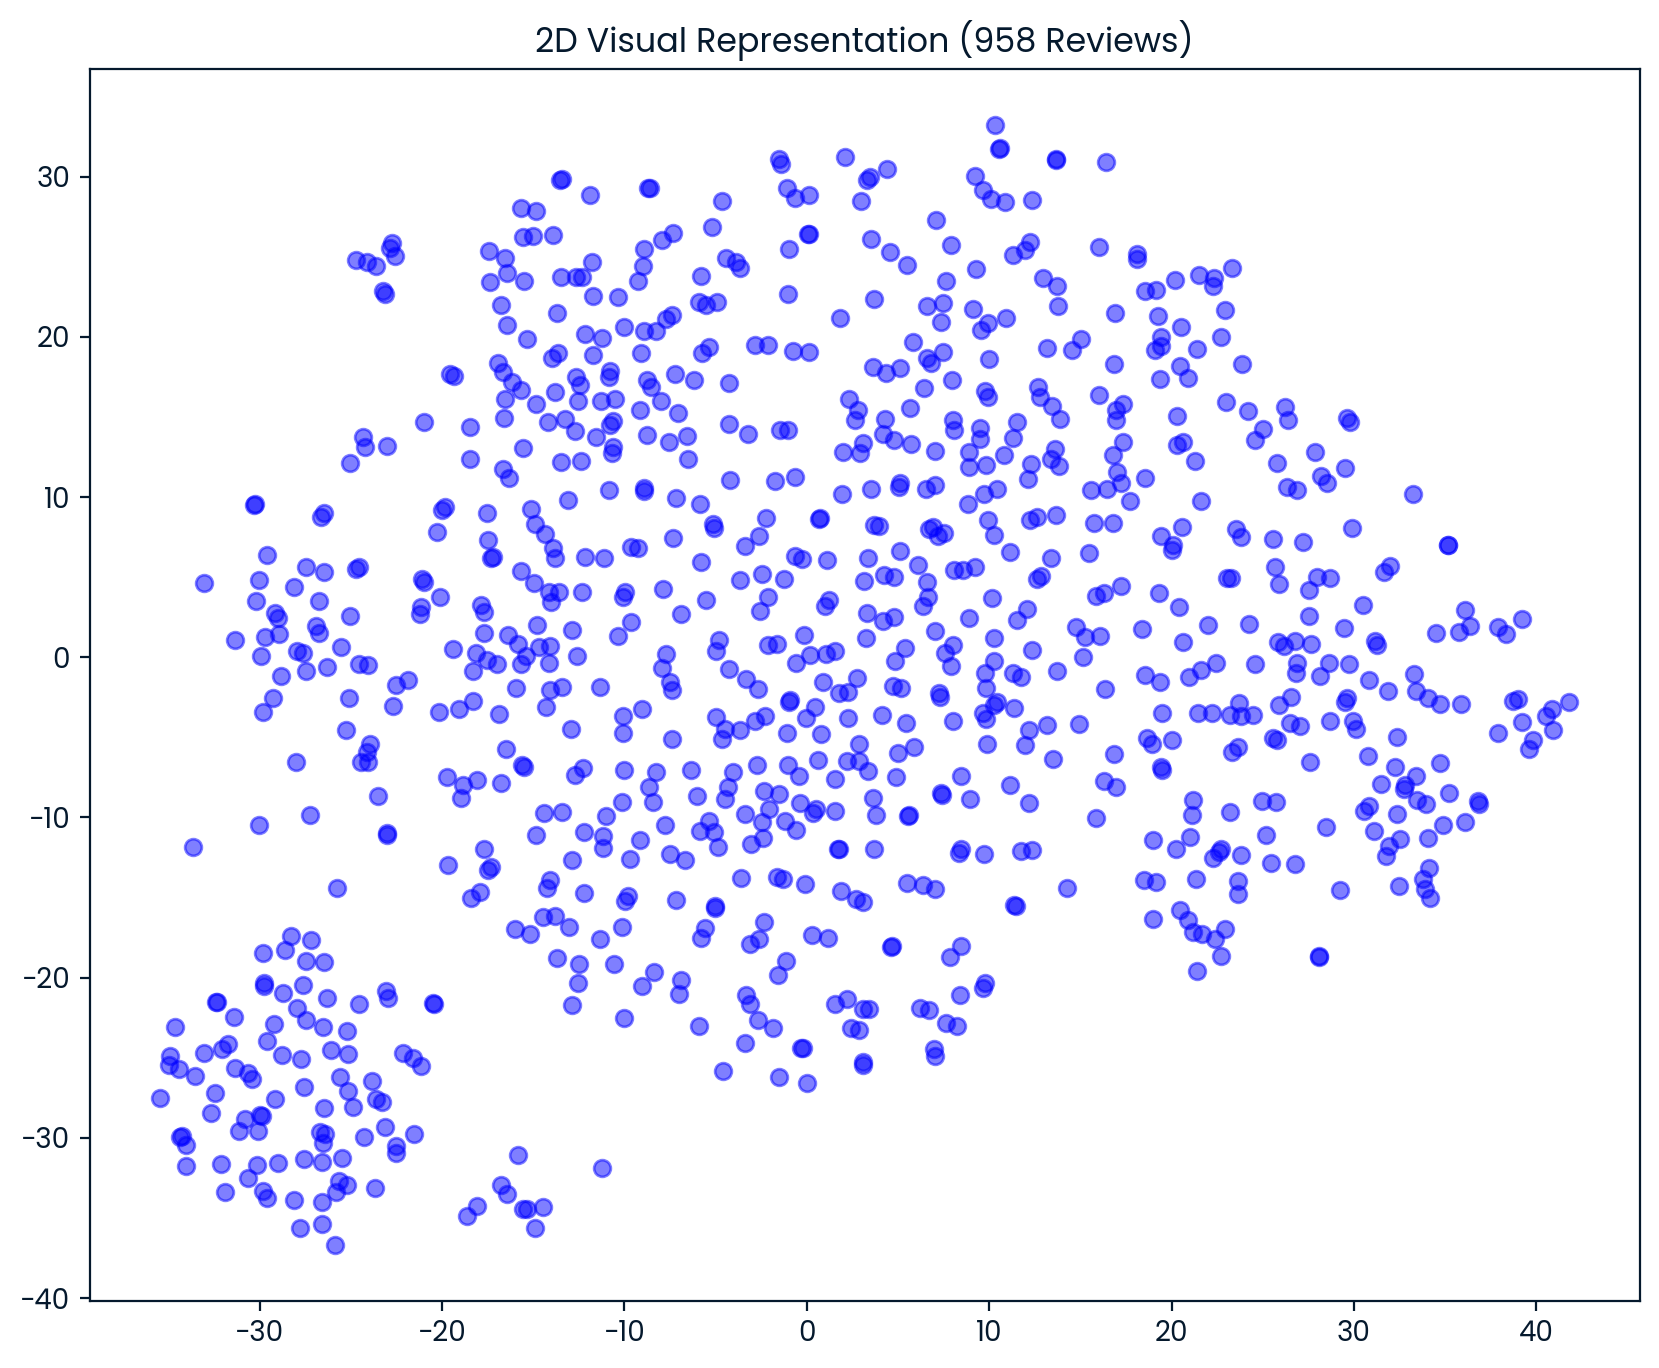

In [27]:
# Reduce to 2D
# Perplexity 30 is standard for ~1000 samples
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5, c='blue')
plt.title(f"2D Visual Representation ({len(embeddings)} Reviews)")
plt.show()

In [28]:
def get_most_similar(query_text, all_embeddings, df, top_n=3):
    # Embed the query
    query_emb = client.embeddings.create(
        input=[query_text], 
        model="text-embedding-3-small"
    ).data[0].embedding
    
    # Calculate similarities
    similarities = cosine_similarity([query_emb], all_embeddings)[0]
    
    # Get top 3 indices
    top_indices = np.argsort(similarities)[-top_n:][::-1]
    return df.iloc[top_indices]['Review Text'].tolist()

# Execute search
target_review = "Absolutely wonderful - silky and sexy and comfortable"
most_similar_reviews = get_most_similar(target_review, embeddings, reviews)